In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [ ]:
file_path = "/content/drive/MyDrive/Tea Project/models/Sales Data Model/Tea Sales data(new).xlsx"

# Load the Excel file
df = pd.read_excel(file_path)
df.head()

,Year,sales code,Doller Rate,Elevation,Quantity (kg),Avg price
0,2024,1,323.88,High grown,967764.0,1055.76
1,2024,1,323.88,Mid grown,726455.0,1039.05
2,2024,1,323.88,Low grown,2819893.0,1328.12
3,2024,2,322.14,High grown,923375.0,1087.26
4,2024,2,322.14,Mid grown,778916.0,1064.73


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           1050 non-null   int64  
 1   sales code     1050 non-null   int64  
 2   Doller Rate    1023 non-null   float64
 3   Elevation      1050 non-null   object 
 4   Quantity (kg)  984 non-null    float64
 5   Avg price      1008 non-null   float64
dtypes: float64(3), int64(2), object(1)
memory usage: 49.3+ KB


In [ ]:
# columns_to_remove = ['sales code']

# # Drop the columns
# df = df.drop(columns=columns_to_remove)

In [ ]:
label_encoder = LabelEncoder()
categorical_columns = ['Elevation']

# Encode each categorical column
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

# Display encoded DataFrame
print("Encoded DataFrame:")
print(df.head())

# Display the mapping of original values to encoded values
for col in categorical_columns:
    print(f"\nMapping for {col}:")
    print(dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))

Encoded DataFrame:
   Year  sales code  Doller Rate  Elevation  Quantity (kg)  Avg price
0  2024           1       323.88          0       967764.0    1055.76
1  2024           1       323.88          2       726455.0    1039.05
2  2024           1       323.88          1      2819893.0    1328.12
3  2024           2       322.14          0       923375.0    1087.26
4  2024           2       322.14          2       778916.0    1064.73

Mapping for Elevation:
{'High grown': 0, 'Low grown': 1, 'Mid grown': 2}


In [ ]:
df.tail()

,Year,sales code,Doller Rate,Elevation,Quantity (kg),Avg price
1045,2018,49,179.74,2,667741.0,507.90
1046,2018,49,179.74,1,2334388.0,594.14
1047,2018,50,180.99,0,889458.0,559.14
1048,2018,50,180.99,2,738612.0,497.86
1049,2018,50,180.99,1,2549945.0,591.52


In [ ]:
null_counts = df.isnull().sum()
null_counts

,0
Year,0
sales code,0
Doller Rate,27
Elevation,0
Quantity (kg),66
Avg price,42


In [ ]:
df.fillna(0, inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Define features (X) and target (y)
X = df.drop(columns=['Quantity (kg)'])
y = df['Quantity (kg)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# List of models to evaluate
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1),
    "Support Vector Regressor (SVR)": SVR(kernel='rbf'),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
}

# Dictionary to store results
results = {}

# Evaluate each model
for name, model in models.items():
    print(f"Evaluating {name}...")
    # Train the model
    model.fit(X_train, y_train)
    # Make predictions
    y_pred = model.predict(X_test)
    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {"MSE": mse, "R2 (Accuracy)": r2}
    print(f"{name} - Mean Squared Error (MSE): {mse:.4f}, R-squared (R2): {r2:.4f}\n")

# Display results
results_df = pd.DataFrame(results).T
print("Model Evaluation Results:")
print(results_df)

# Optional: Feature importance for Random Forest
rf_model = models["Random Forest"]
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importance (Random Forest):")
print(feature_importance)


Evaluating Linear Regression...
Linear Regression - Mean Squared Error (MSE): 883378521580.7272, R-squared (R2): 0.1668

Evaluating Ridge Regression...
Ridge Regression - Mean Squared Error (MSE): 883371901949.5468, R-squared (R2): 0.1668

Evaluating Lasso Regression...
Lasso Regression - Mean Squared Error (MSE): 883378511766.2740, R-squared (R2): 0.1668

Evaluating Support Vector Regressor (SVR)...
Support Vector Regressor (SVR) - Mean Squared Error (MSE): 1332544480427.2715, R-squared (R2): -0.2569

Evaluating Decision Tree...
Decision Tree - Mean Squared Error (MSE): 126066253532.0010, R-squared (R2): 0.8811

Evaluating Random Forest...
Random Forest - Mean Squared Error (MSE): 98297156309.8259, R-squared (R2): 0.9073

Model Evaluation Results:
                                         MSE  R2 (Accuracy)
Linear Regression               8.833785e+11       0.166800
Ridge Regression                8.833719e+11       0.166806
Lasso Regression                8.833785e+11       0.166800
S

<ipython-input-10-34bc6419a266>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='R2', y='Model', data=results_df, palette='viridis')


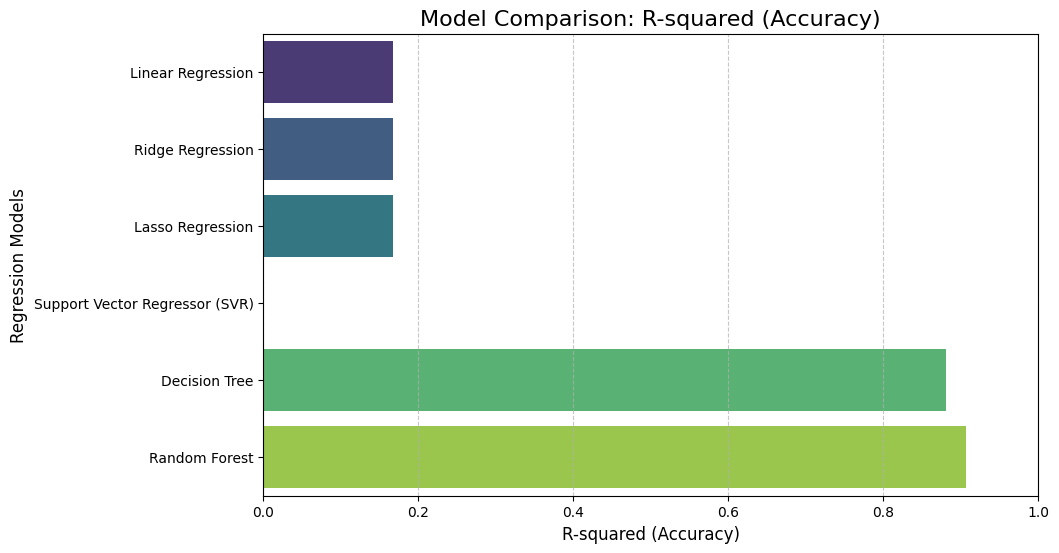

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluate models (from the previous code block)
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1),
    "Support Vector Regressor (SVR)": SVR(kernel='rbf'),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {"MSE": mse, "R2": r2}

# Convert results to a DataFrame for visualization
results_df = pd.DataFrame(results).T.reset_index().rename(columns={'index': 'Model'})

# Plot the bar chart for R-squared (Accuracy)
plt.figure(figsize=(10, 6))
sns.barplot(x='R2', y='Model', data=results_df, palette='viridis')
plt.title('Model Comparison: R-squared (Accuracy)', fontsize=16)
plt.xlabel('R-squared (Accuracy)', fontsize=12)
plt.ylabel('Regression Models', fontsize=12)
plt.xlim(0, 1)  # Assuming R2 values are between 0 and 1
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


In [ ]:

# Define features (X) and target (y)
X = df.drop(columns=['Quantity (kg)'])
y = df['Quantity (kg)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (Accuracy):", r2)

# Optional: Feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance)

Mean Squared Error (MSE): 98297156309.82593
R-squared (Accuracy): 0.9072863845491005

Feature Importance:
       Feature  Importance
3    Elevation    0.761197
4    Avg price    0.163615
2  Doller Rate    0.040867
1   sales code    0.030733
0         Year    0.003589


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         1050 non-null   int64  
 1   sales code   1050 non-null   int64  
 2   Doller Rate  1050 non-null   float64
 3   Elevation    1050 non-null   int64  
 4   Avg price    1050 non-null   float64
dtypes: float64(2), int64(3)
memory usage: 41.1 KB


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Initialize Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

# Evaluate the model
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
print("Train MSE:", mse_train)
print("Test MSE:", mse_test)

Train MSE: 20419172929.709953
Test MSE: 86248715503.9505


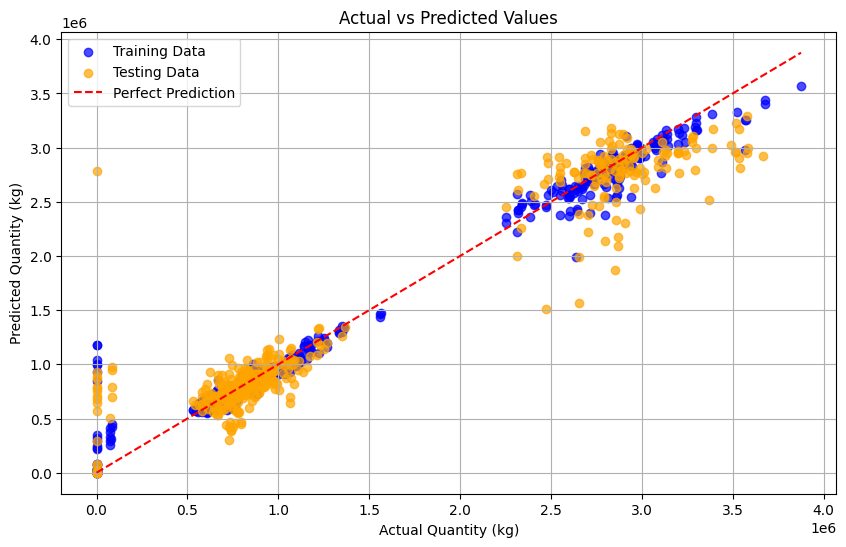

In [ ]:
# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_train_pred, label="Training Data", color="blue", alpha=0.7)
plt.scatter(y_test, y_test_pred, label="Testing Data", color="orange", alpha=0.7)
plt.plot([0, max(y)], [0, max(y)], color="red", linestyle="--", label="Perfect Prediction")

plt.title("Actual vs Predicted Values")
plt.xlabel("Actual Quantity (kg)")
plt.ylabel("Predicted Quantity (kg)")
plt.legend()
plt.grid()
plt.show()

In [ ]:
import joblib
joblib.dump(rf_model, "model_sales_quantity_new.joblib")

['model_sales_quantity_new.joblib']

In [ ]:
def predict_quantity(year, dollar_rate, elevation, avg_price, sales_code):
    """
    Predict the Quantity (kg) based on input parameters.

    Parameters:
        year (float): The year.
        Sales code (int): The sales code.
        dollar_rate (float): The dollar rate.
        elevation (int): The elevation level.
        avg_price (float): The average price.

    Returns:
        float: Predicted quantity.
    """
    input_data = [[year, sales_code, dollar_rate, elevation, avg_price]]
    prediction = rf_model.predict(input_data)
    return prediction[0]

# Example usage
year = 2025
dollar_rate = 400.0
elevation = 1
avg_price = 60.5
sales_code = 45

predicted_quantity = predict_quantity(year, dollar_rate, elevation, avg_price, sales_code)
print(f"Predicted Quantity (kg): {predicted_quantity}")

Predicted Quantity (kg): 29312.53


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
